# Try out code on other images

In [1]:
import my_lib
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from IPython.display import clear_output
plt.rcParams["figure.figsize"] = [10,10]

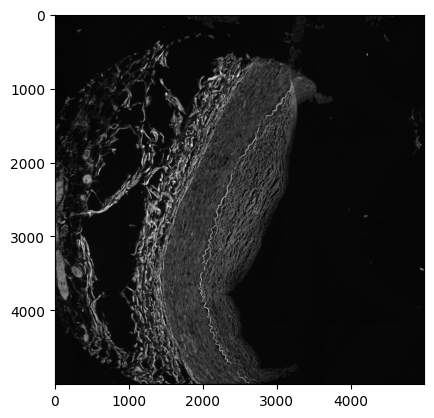

In [2]:
img = cv2.imread('../Example Images/C-8.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

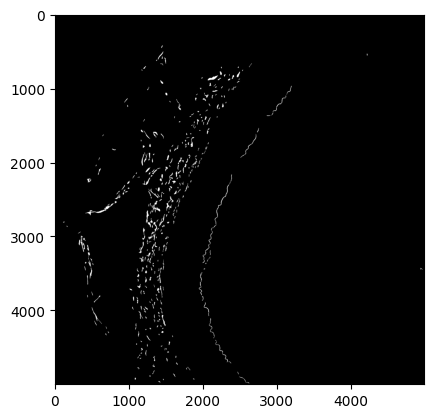

In [3]:
processed = my_lib.generate_gt_img(img)
plt.imshow(processed, cmap='gray')

In [2]:
listed = os.listdir('../Example Images/', )
images = [x for x in listed if '.png' in x]
print(images)

['535_6_8.png', '535_8_2.png', '535_9_5.png', '536_2_2.png', '536_5_1.png', '536_8_3.png', '536_9_6.png', '536_9_7.png', '537_5_2.png', '537_7_11.png', 'C-8.png']


In [7]:
root = '../Example Images/'
for filename in images:
    img = cv2.cvtColor(cv2.imread(root + filename), cv2.COLOR_BGR2GRAY)
    processed = my_lib.generate_gt_img(img, 1.5)
    cv2.imwrite(root + 'ground_truth_1p5pct/gt_' + filename, processed)
print('Finished!')

Finished!


In [2]:
images = ['C-8.png']

<Figure size 1000x1000 with 0 Axes>

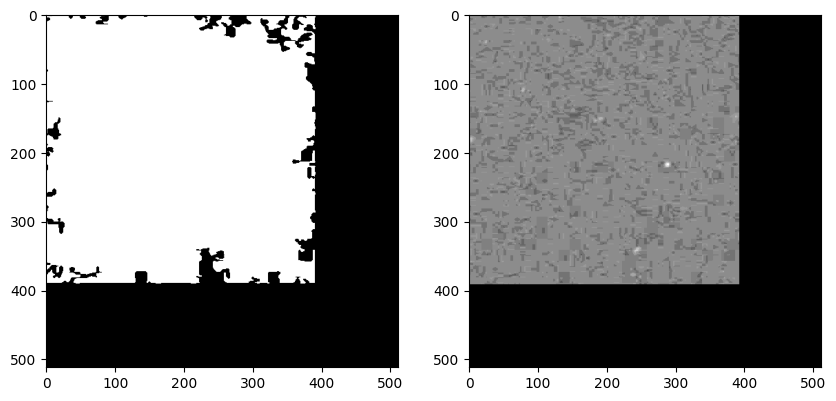

C-8.png:[9,9], pct = 1.4
                Enter a number, b for blank, or a for accept
                	Command: b
Finished!


In [4]:
root = '../Example Images/'
user_in = ''
for filename in images:
    clear_output(wait=True)
    img = cv2.cvtColor(cv2.imread(root + filename), cv2.COLOR_BGR2GRAY) # Black an white image
    # Before we process the image, we should shatter the image into a grid
    imgs = my_lib.shatter_img(img)
    prcsd_imgs = [[] for i in range(len(imgs))]
    
    # now we check each patch and adjust our parameter accordingly
    for row in range(len(imgs)):
        for col in range(len(imgs[0])):
            percent = 1.4
            while True:
                clear_output(wait=True)
                p_string = f"{filename}:[{row},{col}], pct = {percent}\n\
                Enter a number, b for blank, or a for accept\n\
                \tCommand: "
                
                processed = my_lib.generate_gt_img(imgs[row][col], percent)
                plt.figure()
                f, axarr = plt.subplots(1,2)
                axarr[0].imshow(processed, cmap='gray')
                axarr[1].imshow(imgs[row][col], cmap='gray')
                plt.show()
                
                user_in = input(p_string)
                
                if user_in == 'a':
                    prcsd_imgs[row].append(processed)
                    break
                elif user_in == 'b':
                    processed = np.zeros_like(processed)
                    prcsd_imgs[row].append(processed)
                    break
                try:
                    percent = float(user_in)
                except ValueError:
                    print("Could not convert data to a float")
    
    # After the patched processing, we stitch together and save
    out_img = my_lib.stitch_img_grid(prcsd_imgs)
    cv2.imwrite(root + 'ground_truth/gt_' + filename, out_img)
                
print('Finished!')